#### Importes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, recall_score , median_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score
from utils import get_regression_metrics


### Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

- age. Edad del cliente (numérico)

- job. Tipo de trabajo (categórico)

- marital. Estado civil (categórico)

- education. Nivel de educación (categórico) 

- default. ¿Tiene crédito actualmente? (categórico) / FUERA

- housing. ¿Tiene un préstamo de vivienda? (categórico)

- loan. ¿Tiene un préstamo personal? (categórico)

- contact. Tipo de comunicación de contacto (categórico) /FUERA

- month. Último mes en el que se le ha contactado (categórico) 

- day_of_week. Último día en el que se le ha contactado (categórico)

- duration. Duración del contacto previo en segundos (numérico) / FUERA

- campaign. Número de contactos realizados durante esta campaña al cliente (numérico) / FUERA

- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) / FUERA

- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico) /FUERA

- poutcome. Resultado de la campaña de marketing anterior (categórico) / FUERA

- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) 

- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico) 

- nr.employed. Número de empleados. Indicador trimestral (numérico) /FUERA 'Necesito datos de los clientes, no de los chambeadores'

- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico) 


## PASO 1 : Planteamos nuestro problema o nuestro target a investigar


#### ¿Que cliente contratará o no un depósito a largo plazo?

## PASO 2: Recopilacion de datos

Recopilamos la informacion de nuestro DataSet

In [2]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/bank-marketing-campaign-data.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Paso 3: Análisis Descriptivo

In [3]:
df.shape

(41188, 21)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Paso 4: Limpieza de Datos

### Normalizar valores de texto

In [7]:

for col in ['job','marital','education','default','housing','loan','y']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
col

'y'

### Mapear target


In [8]:
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts(dropna=False)

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
df['y_bin'].value_counts(dropna=False)

y_bin
0    36548
1     4640
Name: count, dtype: int64

### Buscamos valores duplicados:

In [10]:
df.duplicated().sum()

np.int64(12)

##### Observaciones:

No encontramos valores duplicados.

### Buscamos valores nulos o sin conocer 

#### Nulos por columna


In [11]:
df.isna().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_bin             0
dtype: int64

### Limpieza de datos: Eliminar información irrelevante



#### Buscamos que informacion es irrelevante para nosotros y asi proceder a eliminarla

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_bin'],
      dtype='object')

### Eliminacion de columnas innecesarias:

**NOTA: Nos aseguramos de hacer una copia para asi no perder el df original.**

In [13]:
df_copy = df.copy()
df_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [14]:
df_copy.drop(["contact", "month", "day_of_week", "campaign", "pdays", "poutcome",
            "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], axis=1, inplace=True)
df_copy

,age,job,marital,education,default,housing,loan,duration,previous,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,261,0,no,0
1,57,services,married,high.school,unknown,no,no,149,0,no,0
2,37,services,married,high.school,no,yes,no,226,0,no,0
3,40,admin.,married,basic.6y,no,no,no,151,0,no,0
4,56,services,married,high.school,no,no,yes,307,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,0,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,383,0,no,0
41185,56,retired,married,university.degree,no,yes,no,189,0,no,0
41186,44,technician,married,professional.course,no,no,no,442,0,yes,1


#### Observaciones

- Eliminamos las columnas `contact` `month` `day_of_week` `campaign` `pdays` `poutcome` `emp.var.rate` `cons.price.idx` `cons.conf.idx` `euribor3m` `nr.employed` , ya que considero que son variables que no influirian en la decision de algun cliente, y que influye mas en las relaciones entre los bancos.

## Paso 5: Análisis de Variables

### Análisis de Variables Univariante

### Análisis de Variables Univariante Categóricas

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   duration   41188 non-null  int64 
 8   previous   41188 non-null  int64 
 9   y          41188 non-null  object
 10  y_bin      41188 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.5+ MB


#### Hacemos nuestro análisis univariante numericas:

Pasos que seguiremos:

- Histogramas, boxplots.

- Medidas de tendencia central (media, mediana) y dispersión (varianza, desviación).

- Outliers (IQR, z-score).


##### Buscamos outliers

### Hacemos nuestro análisis univariante Categóricas:

con los siguientes pasos a seguir :

1. Frecuencias absolutas y relativas
2. Tablas de frecuencia 
3. Visualización con gráfico
4. Medidas de concentración y diversidad

#### Nuestra variables categorica son:

1. job
2. marital
3. education
4. default
5. housing
6. loan
7. y

Para simplificar la tarea, creamos este pequeño bucle que nos aportara la informacion que queremos ver, de cada variable


Variable: job
job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64


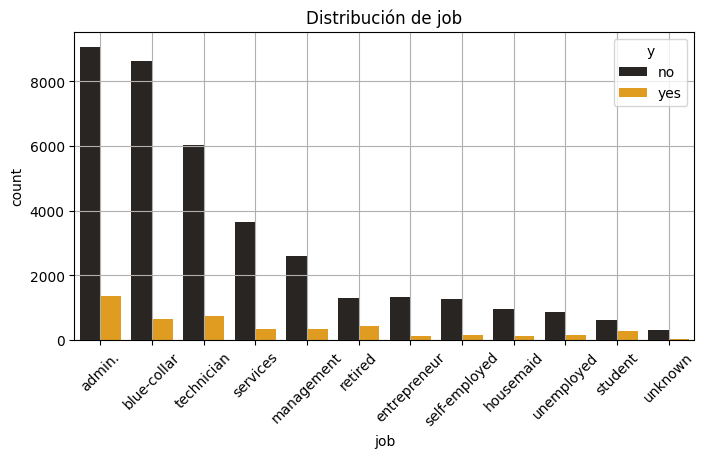

NameError: name 'chi2_contingency' is not defined

In [16]:
categorical_vars = ['job','marital','education','default','housing','loan','y']

for col in categorical_vars:
    print(f"\nVariable: {col}")
    print(df[col].value_counts(normalize=True) * 100)

    # Gráfico
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df,hue='y', order=df_copy[col].value_counts().index , palette='dark:orange')
    plt.xticks(rotation=45)
    plt.grid()
    plt.title(f"Distribución de {col}")
    plt.show()

    # Tabla cruzada con y_bin
    pd.crosstab(df_copy[col], df_copy['y_bin'], normalize='index')

    # Chi-cuadrado
    table = pd.crosstab(df[col], df_copy['y_bin'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Chi-cuadrado p-valor: {p}")


##### Observado los anteriores graficos, hemos decidido que:

- Variables muy útiles (significativas): job, education, marital, default.

- Variables poco útiles (no significativas): housing, loan.

**Precaución:**

- default tiene categorías muy desbalanceadas puede necesitar recodificación.

- y está desbalanceada aplicar técnicas de balanceo antes de entrenar.


Por lo cual descartaremos:

-  housing p-valor ≈ 0.058, no significativa.

-  loan p-valor ≈ 0.58, sin relación con y_bin.


### Hacemos nuestro analisis análisis bivariante


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   duration   41188 non-null  int64 
 8   previous   41188 non-null  int64 
 9   y          41188 non-null  object
 10  y_bin      41188 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.5+ MB


### Numérica vs. numérica:

In [ ]:
df_copy[['age','duration','previous']].corr()


,age,duration,previous
age,1.000000,-0.000866,0.024365
duration,-0.000866,1.000000,0.020640
previous,0.024365,0.020640,1.000000


#### - Heatmap de correlaciones:


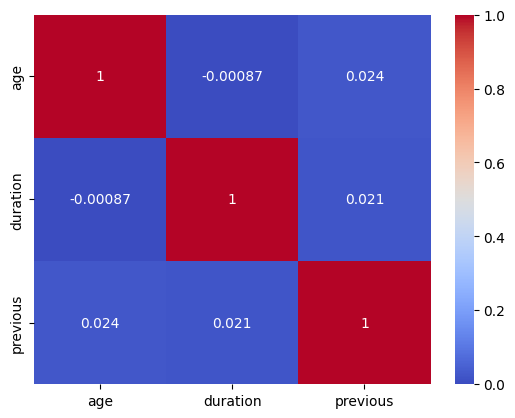

In [ ]:
sns.heatmap(df_copy[['age','duration','previous']].corr(), annot=True, cmap='coolwarm')
plt.show()


##### Conclusion

- No hay relaciones lineales fuertes entre las variables numéricas.
- Puedes usarlas todas en el modelo sin preocuparte por redundancia.
- La clave será analizar cómo cada una se asocia con y_bin (ej. duración de la llamada suele ser más relevante para predecir aceptación).


####  Gráficos de dispersión


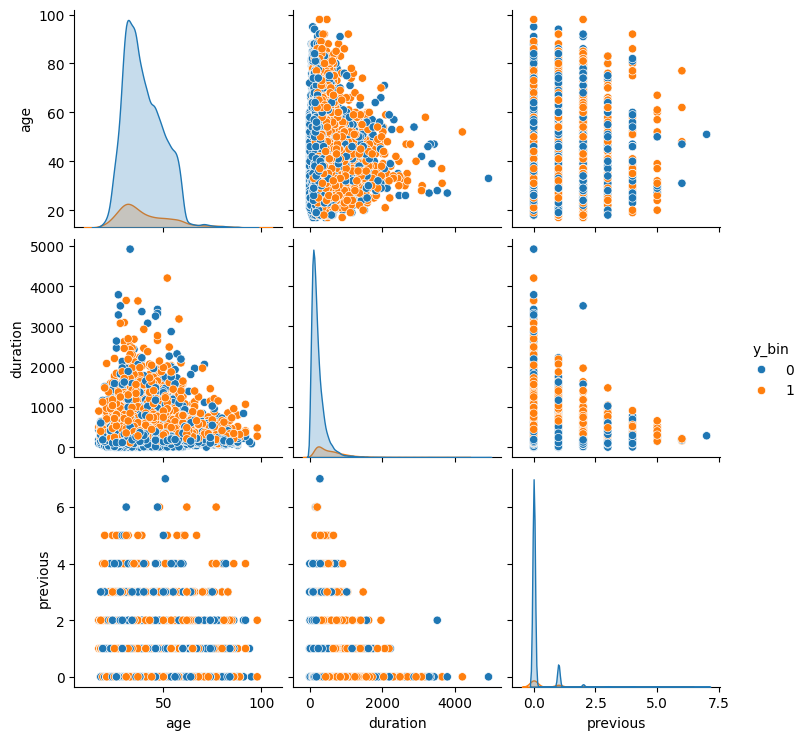

In [ ]:
sns.pairplot(df_copy[['age','duration','previous','y_bin']], hue='y_bin')
plt.show()

##### Conclusion

- Duration es clave: las llamadas largas están más asociadas con respuestas positivas.
- Age y Previous aportan menos por sí solas, pero pueden ser relevantes en combinación con variables categóricas.
- El análisis bivariante numérico vs numérico ayuda a decidir qué variables numéricas son más prometedoras para el modelo.


### Numérica vs. categórica:



- Boxplots / Violin plots:


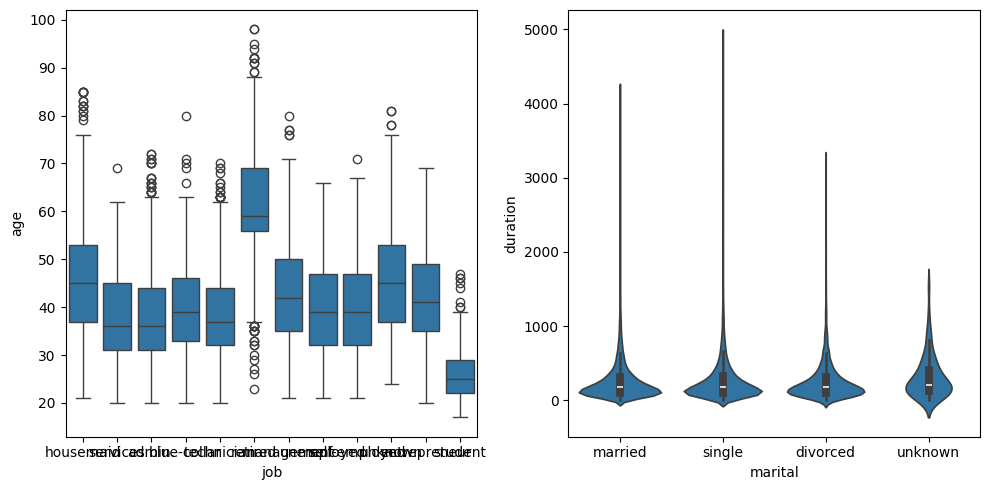

In [ ]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)
sns.boxplot(ax=axis[0], x='job', y='age', data=df_copy)
sns.violinplot(ax=axis[1], x='marital', y='duration', data=df_copy)
plt.tight_layout()
plt.show()

##### Conclusion

- El boxplot de age vs job confirma una relación lógica y significativa: la edad está condicionada por el tipo de trabajo.
- El violin plot de duration vs marital muestra que la duración de la llamada tiene una distribución similar entre estados civiles, aunque con algunos outliers que podrían ser relevantes para el target.


- ANOVA / t-test:
Evalúa si las medias de la variable numérica difieren significativamente entre categorías.


In [ ]:
t_test = f_oneway(*[df_copy.loc[df_copy['marital']==cat,'age'] for cat in df_copy['marital'].unique()])
t_test

F_onewayResult(statistic=np.float64(2921.1300216311192), pvalue=np.float64(0.0))



### Categórica vs. categórica:



- Tablas de contingencia:


In [ ]:
pd.crosstab(df_copy['job'], df_copy['y_bin'], normalize='index')


y_bin,0,1
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


#### Gráficos de barras apiladas:





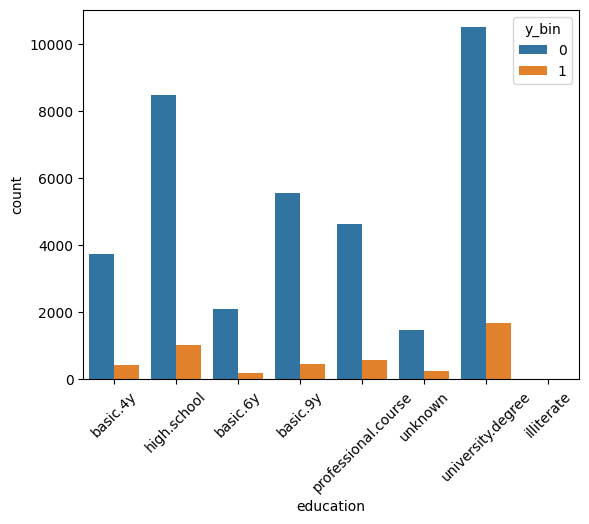

In [ ]:
sns.countplot(x='education', hue='y_bin', data=df_copy)
plt.xticks(rotation=45)
plt.show()

##### Conclusion

- La educación está asociada con la respuesta, pero la tendencia general es que la mayoría rechaza la campaña.

- Chi-cuadrado:


In [ ]:
table = pd.crosstab(df_copy['marital'], df_copy['y_bin'])
chi2, p, dof, expected = chi2_contingency(table)
f"p-valor: {p}"


'p-valor: 2.068014648442211e-26'

##### Conclusion

Un p‑valor tan bajo como 2e‑26 indica que la asociación entre esas variables es real y muy fuerte, no atribuible al azar.
Esto convierte a esa variable en una candidata importante para tu modelo predictivo



### Análisis multivariante

#### Matriz de correlación ampliada


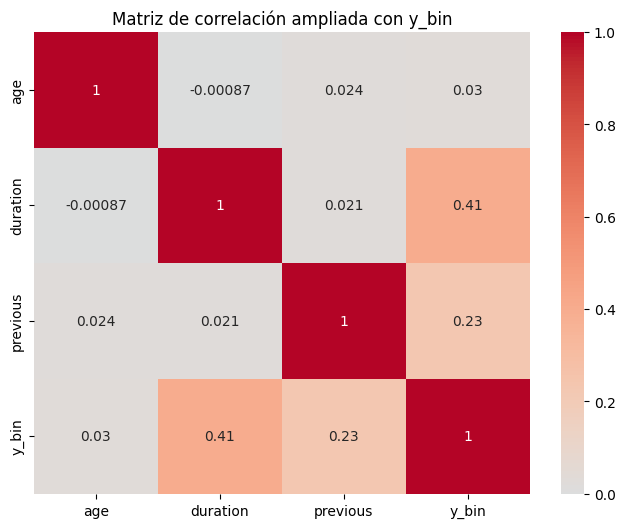

In [ ]:
vars_num = ['age', 'duration', 'previous', 'y_bin']
corr_matrix = df_copy[vars_num].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación ampliada con y_bin")
plt.show()


##### Conclusion

- Las numéricas son independientes entre sí.
- Solo duration muestra una relación clara con el target.
- Esto confirma que en el modelado debería dar más peso a duration, mientras que age y previous pueden ser secundarios o útiles en interacciones.


#### Multicolinealidad (VIF)


In [ ]:
X = df_copy[['age', 'duration', 'previous']]
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data


,Variable,VIF
0,const,16.805132
1,age,1.000596
2,duration,1.000428
3,previous,1.001022


##### Conclusion

- Todos los VIF están muy cerca de 1, lo que indica que ninguna variable numérica está correlacionada con las otras.

- El paso de VIF confirma que se puede usar age, duration y previous juntas en el modelo sin riesgo de redundancia.

- La informacion que aportan es independiente y complementaria.


### Interacciones entre variables

#### Gráficos de barras agrupada

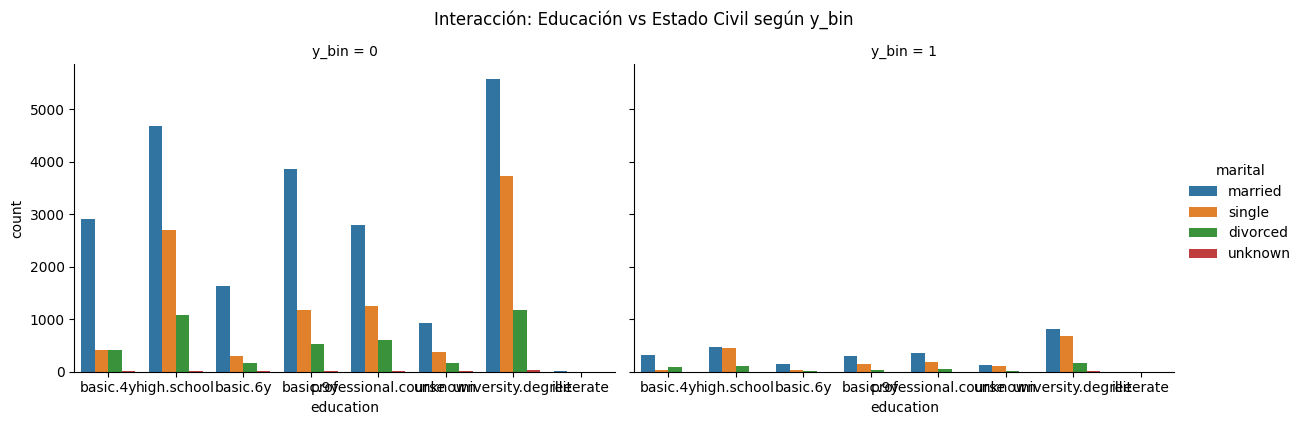

In [ ]:
sns.catplot(x='education', hue='marital', col='y_bin', data=df_copy, kind='count', height=4, aspect=1.5)
plt.suptitle("Interacción: Educación vs Estado Civil según y_bin", y=1.05)
plt.show()


##### Conclusion

Este grafico nos permite:

- Detectar segmentos de clientes más propensos a aceptar.
- Diseñar campañas más efectivas dirigidas a esos perfiles


#### Boxplots segmentados

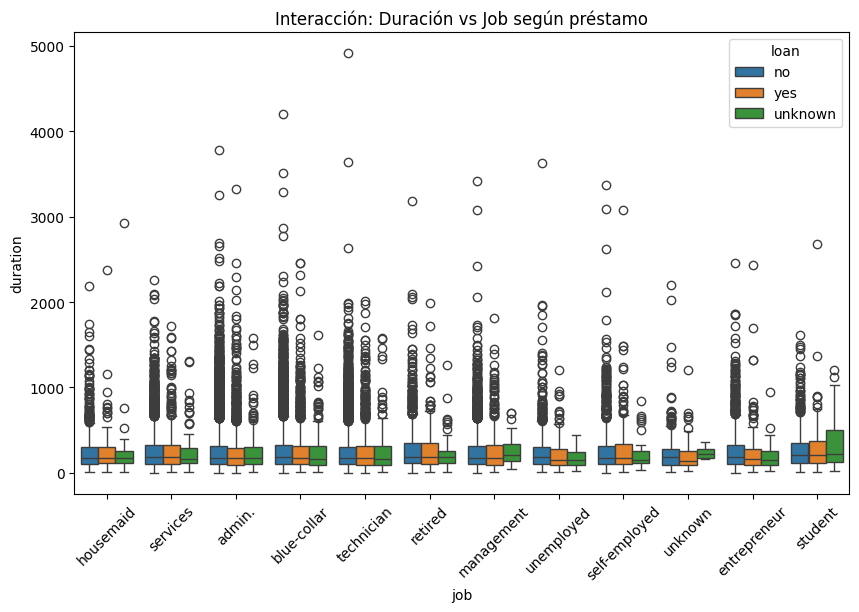

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='job', y='duration', hue='loan', data=df_copy)
plt.title("Interacción: Duración vs Job según préstamo")
plt.xticks(rotation=45)
plt.show()


##### Conclusion

- Esta interacción sugiere que el efecto de la duración sobre la aceptación puede depender del tipo de trabajo y del estado de préstamo.

- Este gráfico confirma que duration no actúa igual en todos los perfiles.
- El tipo de trabajo y el estado de préstamo modulan su impacto, lo que puede ser clave para segmentar clientes o mejorar el modelo predictivo.


#### Tablas cruzadas con múltiples variables

In [ ]:
cross_tab = pd.crosstab([df_copy['job'], df_copy['education']], df_copy['y_bin'], normalize='index')
cross_tab.round(3)



y_bin                            0      1
job     education                        
admin.  basic.4y             0.870  0.130
        basic.6y             0.947  0.053
        basic.9y             0.916  0.084
        high.school          0.885  0.115
        illiterate           1.000  0.000
...                            ...    ...
unknown basic.9y             0.968  0.032
        high.school          0.946  0.054
        professional.course  0.917  0.083
        university.degree    0.756  0.244
        unknown              0.870  0.130

[90 rows x 2 columns]

##### Conclusion

- La interacción entre job y education sí influye significativamente en el target y_bin.
- Hay combinaciones que destacan por su mayor tasa de aceptación, lo que puede ser clave para segmentar clientes o enriquecer el modelo predictivo.
- Este tipo de análisis te permite pasar de correlaciones simples a patrones de comportamiento más complejos y útiles.


#### Boxplot: duración vs estado civil segmentado por housing

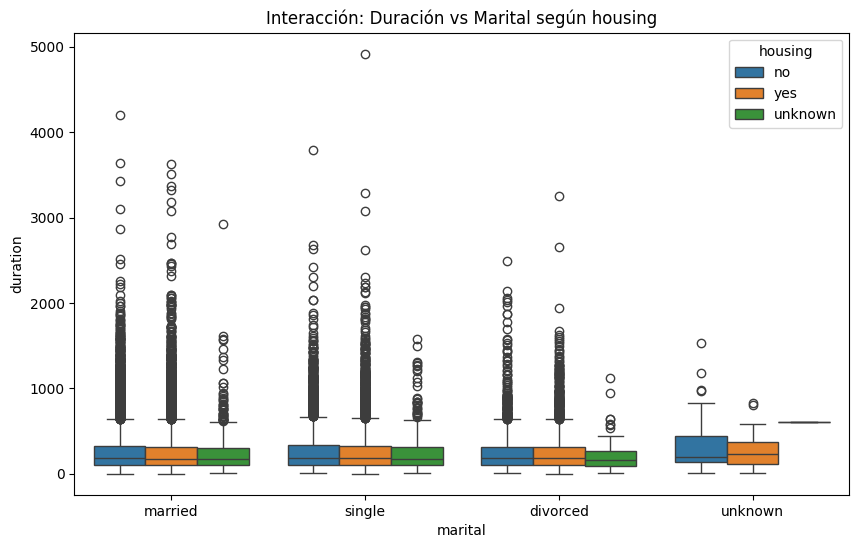

In [ ]:

plt.figure(figsize=(10,6))
sns.boxplot(x='marital', y='duration', hue='housing', data=df_copy)
plt.title("Interacción: Duración vs Marital según housing")
plt.show()


##### Conclusion

- El gráfico confirma que duration no actúa igual en todos los perfiles.
- El estado civil y el estado de vivienda modulan su impacto, lo que puede ser clave para segmentar clientes o mejorar el modelo predictivo.


 ### Visualización multivariante


####  Pairplot  de variables numericas


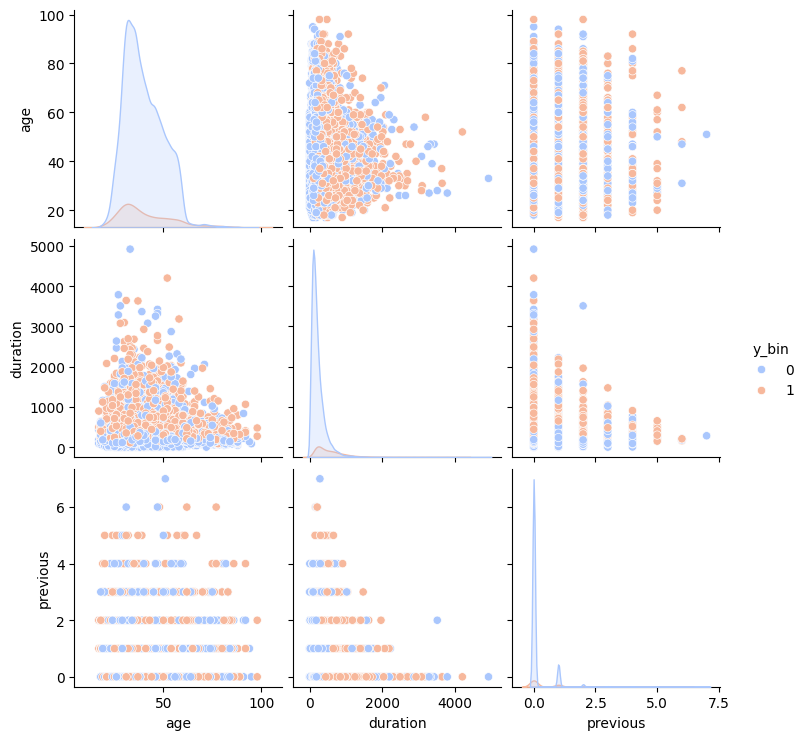

In [ ]:
sns.pairplot(df_copy, vars=['age', 'duration', 'previous'], hue='y_bin', palette='coolwarm')
plt.show()

##### Conclusion

- Muestra cómo se distribuyen las variables numéricas entre sí.
- Coloreado por y_bin para ver si hay agrupaciones o separaciones.
- Esperamos que duration muestre mayor diferenciación entre clases.


#### Heatmap de correlaciones




##### factorizamos 

In [ ]:
df_copy['job'] = pd.factorize(df['job'])[0]
df_copy['marital'] = pd.factorize(df['marital'])[0]
df_copy['default'] = pd.factorize(df['default'])[0]
df_copy['housing'] = pd.factorize(df['housing'])[0]
df_copy['loan'] = pd.factorize(df['loan'])[0]

##### Visualizamos el Heatmap con todas las variables

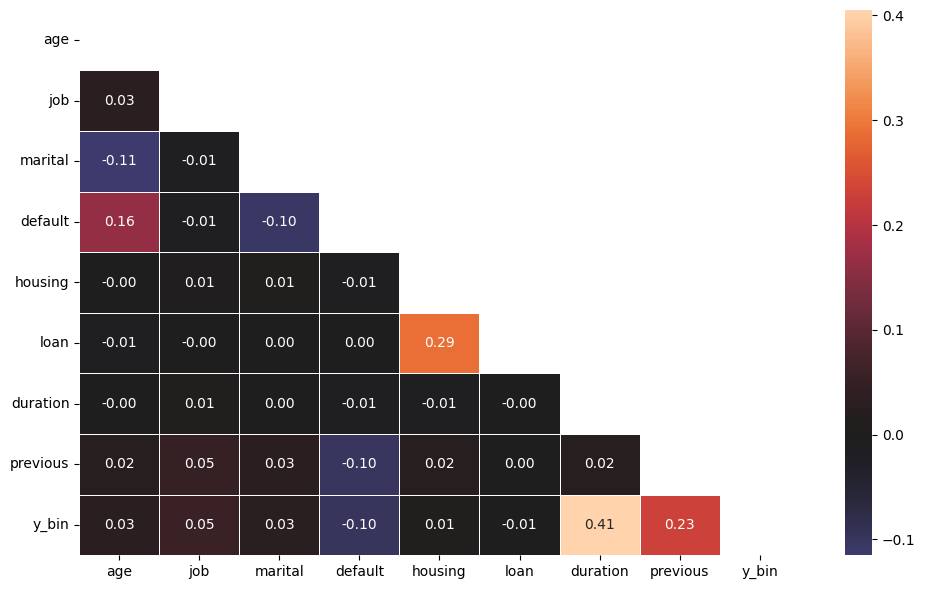

In [ ]:
corr = df_copy[["age", "job", "marital", "default", "housing", "loan", "duration", "previous", "y_bin"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f", center=0)

plt.tight_layout()
plt.show()

##### Conclusion

- Las variables más predictivas para y_bin son duration y previous.
- Las variables categóricas aportan poco por sí solas, pero podrían ser útiles en interacciones.
- Hay poca multicolinealidad, lo que es bueno para la estabilidad del modelo.


## Paso 6: Ingeniería de características

#### Crear nuevas variables (ej. binning de edad, ratios).

In [ ]:
df_copy['duration_bin'] = pd.cut(df_copy['duration'],
                            bins=[0, 200, 600, 1500, df['duration'].max()],
                            labels=['muy_corta', 'corta', 'media', 'larga'])


- Decisiones tomadas tras el EDA:
- Agrupar categorías raras.
- Crear nuevas variables (ej. binning de edad, ratios).
- Transformaciones (log, normalización).
- Codificación inicial (One-Hot, Target Encoding)


#### Codificación de categóricas


In [ ]:
num_vars = ['age', 'duration', 'previous']
cat_vars = ['job', 'education', 'marital', 'housing', 'loan', 'default', 'duration_bin']
df_encoded = pd.get_dummies(df_copy[cat_vars], drop_first=True)
df_encoded

,job,marital,housing,loan,default,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,duration_bin_corta,duration_bin_media,duration_bin_larga
0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False
1,1,0,0,0,1,False,False,True,False,False,False,False,False,False,False
2,1,0,1,0,0,False,False,True,False,False,False,False,True,False,False
3,2,0,0,0,0,True,False,False,False,False,False,False,False,False,False
4,1,0,0,1,0,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,0,1,0,0,False,False,False,False,True,False,False,True,False,False
41184,3,0,0,0,0,False,False,False,False,True,False,False,True,False,False
41185,5,0,1,0,0,False,False,False,False,False,True,False,False,False,False
41186,4,0,0,0,0,False,False,False,False,True,False,False,True,False,False


#### Interacción: job + education


In [ ]:
df_copy['job_edu'] = df_copy['job'].astype(str) + "_" + df_copy['education'].astype(str)
df_job_edu = pd.get_dummies(df_copy['job_edu'], drop_first=True)


#### Variables derivadas


In [ ]:
df_copy['contact_intensity'] = df_copy['previous'] / df_copy['duration'].replace(0, 1)  # evitar división por cero
df_copy['is_retired_no_loan'] = ((df_copy['job'] == 'retired') & (df_copy['loan'] == 'no')).astype(int)
df_copy['is_single_high_edu'] = ((df_copy['marital'] == 'single') & (df_copy['education'] == 'university.degree')).astype(int)



### Detección de patrones y outliers

- Outliers en numéricas (boxplots, z-score).

- Categorías raras en categóricas (frecuencia <1%).

- Distribuciones sesgadas (skewness, kurtosis).


## Paso 7: Split (dos métodos o enfoques)

#### División en train/test (ej. 80/20).


In [ ]:
X = df.drop(["y"], axis=1)
y = df["y"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Encoding

In [ ]:
numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
])


X_train = preprocesador.fit_transform(X_train)
X_test = preprocesador.transform(X_test)

#### Entrenar y modular

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


####  Predicciones



In [ ]:

lr_y_pred_train = lr_model.predict(X_train)
lr_y_pred_test = lr_model.predict(X_test)

#### Métricas de evaluación


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

results= pd.DataFrame(
    {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Value': [accuracy, precision, recall, f1]
    }
)

#Resultados antes de la optimizacion
results

,Metric,Value
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0


##### Conclusion

1. Accuracy: El modelo acierta en casi el 90% de los casos. Pero cuidado: si las clases están desbalanceadas, esta métrica puede ser engañosa.

2. Precision: De todas las veces que el modelo predijo “sí” (y = yes), solo el 60.6% eran correctas. Hay bastantes falsos positivos.

3. Recall: Solo detecta el 27.4% de los verdaderos “sí”. Es decir, se le escapan muchos casos positivos.

4. F1 Score: Promedio armónico entre precisión y recall. Indica que el modelo tiene dificultades para capturar correctamente los positivos


## Paso 8: Selección de características

#### Univariate Selection (SelectKBest + chi2 o f_classif)

In [ ]:
constant_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]
constant_cols

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_train = X_train.drop(columns=constant_cols)


In [ ]:
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
selected_features


Index(['duration', 'previous', 'job_blue-collar', 'job_retired', 'job_student',
       'education_basic.9y', 'education_university.degree', 'marital_married',
       'marital_single', 'default_unknown', 'duration_bin_corta',
       'duration_bin_media', 'duration_bin_larga', 'blue-collar_basic.4y',
       'blue-collar_basic.9y', 'retired_basic.4y', 'student_high.school',
       'student_unknown', 'is_retired_no_loan', 'is_single_high_edu'],
      dtype='object')

In [ ]:
X_selected = X_train[selected_features]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_train, test_size=0.2, random_state=42,)


In [ ]:
model = LogisticRegression(max_iter=1000,  class_weight='balanced')
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

results= pd.DataFrame(
    {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Value': [accuracy, precision, recall, f1]
    }
)

# Resultados despues de la optimizacion
results

,Metric,Value
0,Accuracy,0.808801
1,Precision,0.364426
2,Recall,0.794192
3,F1 Score,0.499603


#### Comparación de resultados


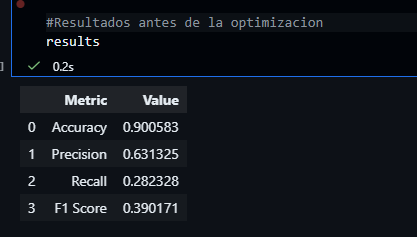


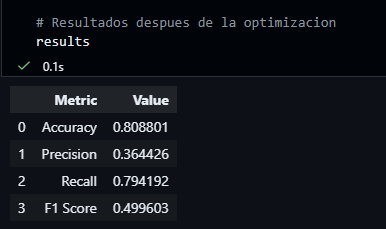